![Alt text](image.png)



Gradient Boosting 
- Is a popular machine learning algorithm that works by combining multiple weak learners, typically decision trees, to create a strong predictive model. It builds the model in a stage-wise fashion, where each new model corrects the errors made by the previous ones.
- Is effective because it learns from its mistakes iteratively, gradually improving the model's predictive performance. It's widely used in various machine learning tasks, including classification and regression, and is known for its robustness and ability to handle complex datasets. However, it may require careful tuning of hyperparameters and can be computationally expensive.

✨ Import Libraries

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import os 
os.system("cls")

0

✨ Implementation of Gradient Boosting From Skratch

In [61]:

class Gradient_Boosting_Regressor :
    def __init__(self , num_of_models = 100, learning_rate = 0.1 ,max_depth = 2 ):
        self.num_of_models = num_of_models
        self.learning_rate = learning_rate      # fixeed for all models 
        self.models = []     # list contsins the models we used  
        self.max_depth = max_depth
        self.y = None
    def fit (self , X , y):
        self.y = y
        initial_predetion = np.mean(y)      # mean for y 
        y_hat = np.ones_like (y) * initial_predetion   # mean as vector for all data point 

        for _ in range (self.num_of_models):
            error = y - y_hat
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X,error)      
            predicted_error = model.predict(X)                 # predict error
            y_hat+= self.learning_rate*predicted_error         # y hat (we want to predict) 
            self.models.append(model)    

    def predict(self , X):    # to predict new data point 
        # sum of initial prediction (mean) and error of each model multiply of learning rate 
        y_hat = np.mean(self.y)    # initail value 
        for model in self.models:
            y_hat += self.learning_rate * model.predict(X)
        return y_hat



✨ Loading Data 

In [62]:
data = pd.read_csv("data.csv")
data

,X,y
0,0.093949,0.639861
1,0.101092,0.100920
2,0.195939,0.194688
3,0.301127,0.296597
4,0.355180,0.347759
...,...,...
75,4.818314,-0.043969
76,4.882297,-0.985600
77,4.883805,-0.985344
78,4.893092,-0.983718


✨ Split Data ( X , y )

In [63]:
X = data.drop("y", axis = 1).values
y = data["y"].values

✨ Use Model Which we built from Sktarch 

In [64]:
model = Gradient_Boosting_Regressor(num_of_models=100)
model.fit(X,y)

✨ Predict and Visulaization 

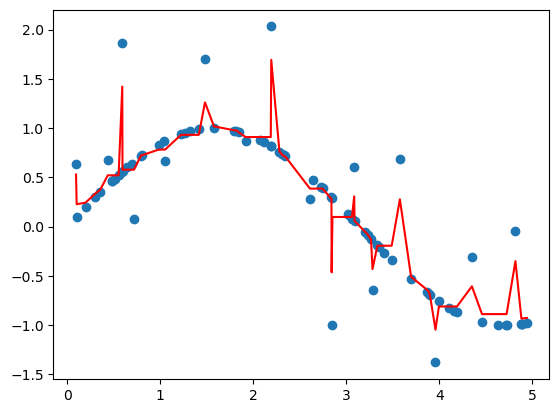

In [65]:
y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,c = "r")       

 🕵️‍♀️ Note  :
  - There is overfitting  we can reduce it by reducing  the value of learning_rate 

✨ Model after reducing learning_rate 

In [66]:
model = Gradient_Boosting_Regressor(num_of_models=100 ,learning_rate=0.01)
model.fit(X,y)

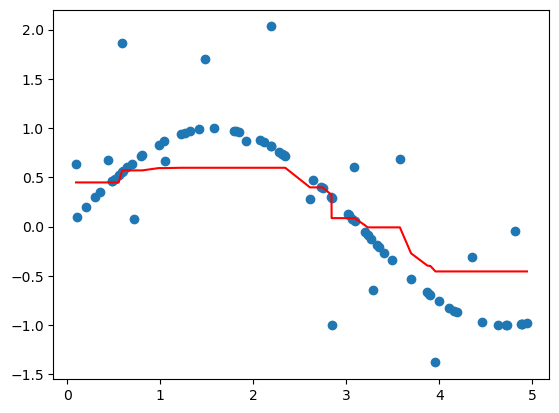

In [67]:
y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,c = "r")       

🕵️‍♀️ Note : 
 - There is underfitting  we can reduce it by adding more models (weak learners) 

✨ Model after Maximize the number of models 

In [68]:
model = Gradient_Boosting_Regressor(num_of_models=400 ,learning_rate=0.01)
model.fit(X,y)

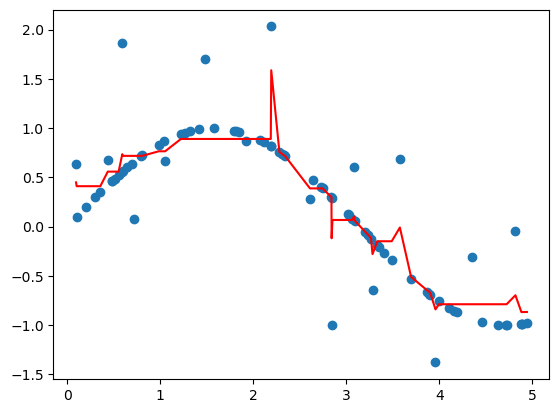

In [69]:
y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,c = "r")   

🕵️‍♀️ Note :
- The model become able to  generalize better 
 - we can use best  value for num_of_models and learning_rate using (parameter tuning )

✨ Use built in algorithm from sikit learn 

In [70]:
model = GradientBoostingRegressor(n_estimators= 400 , learning_rate= 0.01 )
model.fit(X,y)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=400)

✨ Predict and visualization 

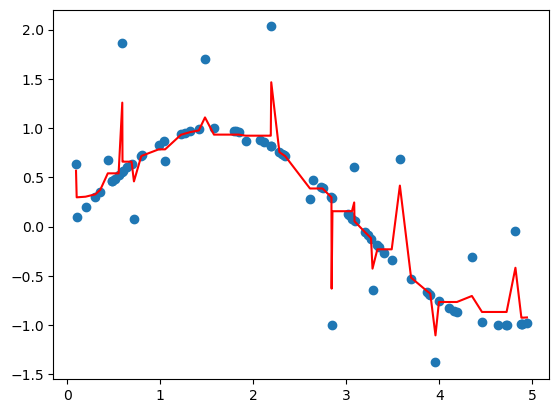

In [71]:
y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,c = "r")   

- Thanks 💖